## Network Intrusion with KDD Cup99 Dataset

In today's digital age, network security is a paramount concern for individuals, organizations, and governments alike. The increasing reliance on computer networks and the internet has opened up new avenues for cyber threats and malicious activities. To safeguard against these threats, the field of network intrusion detection has emerged as a critical area of research and application.

The KDD Cup99 dataset stands as a seminal contribution to the domain of network intrusion detection. It has played a pivotal role in advancing our understanding of cyber threats and bolstering network security strategies. This dataset is widely used by researchers, data scientists, and cybersecurity experts to develop and evaluate intrusion detection systems.

The KDD Cup99 dataset stands as a seminal contribution to the domain of network intrusion detection. It has played a pivotal role in advancing our understanding of cyber threats and bolstering network security strategies. This dataset is widely used by researchers, data scientists, and cybersecurity experts to develop and evaluate intrusion detection systems.

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Exploratory Data Analysis](#EDA)
5. [Preprocess dataset](#Preprocess)
6. [Model Building](#Modelling)

<a name="Libraries"></a>
## 1. Importing libraries

In [1]:
import os
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import svm
import tensorflow as tf
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from tensorflow.keras import regularizers
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingClassifier, VotingClassifier

<a name="Data"></a>
## 2. Loading data

In [2]:
df_train= pd.read_csv(r'C:\Users\ADMIN\Documents\Networkdetection\kddcup\kddcup99.csv')

In [3]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


<a name="Statistics"></a>
## 3. Statistical summaries

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [5]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286361,292.907131,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028996,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147107,246.322736,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142397,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_train.shape

(494020, 42)

In [7]:
# Check for missing values
df_train.isnull().sum().any()

False

No missing values nor duplicate this shows that this dataset was well cleaned.

## Preprocessing

In [8]:
target = 'label'
print(df_train.label.value_counts())

label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64


In [9]:
df_train.label.value_counts

<bound method IndexOpsMixin.value_counts of 0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
494015    normal
494016    normal
494017    normal
494018    normal
494019    normal
Name: label, Length: 494020, dtype: object>

In [10]:
df_train.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
lnum_compromised                  23
lroot_shell                        2
lsu_attempted                      3
lnum_root                         20
lnum_file_creations               18
lnum_shells                        3
lnum_access_files                  7
lnum_outbound_cmds                 1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

In [11]:
df_train['label'].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [12]:
df_train['label'] = df_train['label'].astype('object')
df_train.loc[df_train['label'] != 'normal', 'label'] = 1
df_train.loc[df_train['label'] == 'normal', 'label'] = 0
print(df_train['label'].value_counts())
df_train['label'] = df_train['label'].astype(dtype=np.int32)

label
1    396743
0     97277
Name: count, dtype: int64


In [13]:

import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = df_train
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df["label"].value_counts().values[0:1],
           x=['Normal'],
           text = df["label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Attack', 
           y=df["label"].value_counts().values[1:2],
           x=['Attack'],
           text = df["label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)


In [14]:
df1 = df[df["label"] == 0][:95000]
df2 = df[df["label"] == 1][:95000]
df_equal = pd.concat([ df1,df2], axis =0)

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [16]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df_equal["label"].value_counts().values[0:1],
           x=['Normal'],
           text = df_equal["label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Attack', 
           y=df_equal["label"].value_counts().values[1:2],
           x=['Attack'],
           text = df_equal["label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [17]:
df_equal.groupby(target)['label'].value_counts(normalize=True).sort_values(ascending=False)
df_equal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166220,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1
166221,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1
166222,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1
166223,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1


In [18]:
df_train.groupby(target)['label'].value_counts(normalize=True).sort_values(ascending=False)
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


<a name="EDA"></a>
## 4. Exploratory Data Analysis

In [19]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols,figsize=(18, 18))
    colors = plt.cm.Set3(np.linspace(0, 1, len(cols_list)))  # Custom color palette

    for ax, col, color in zip(axes.ravel(), cols_list, colors):
        counts = df[col].value_counts()
        wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.0f%%', colors=plt.cm.Set3(np.random.rand(len(counts)))) 
        ax.set_title(str(col), fontsize=15)
        plt.setp(autotexts, size=10)  # Set font size for autopct labels
        
    plt.show()

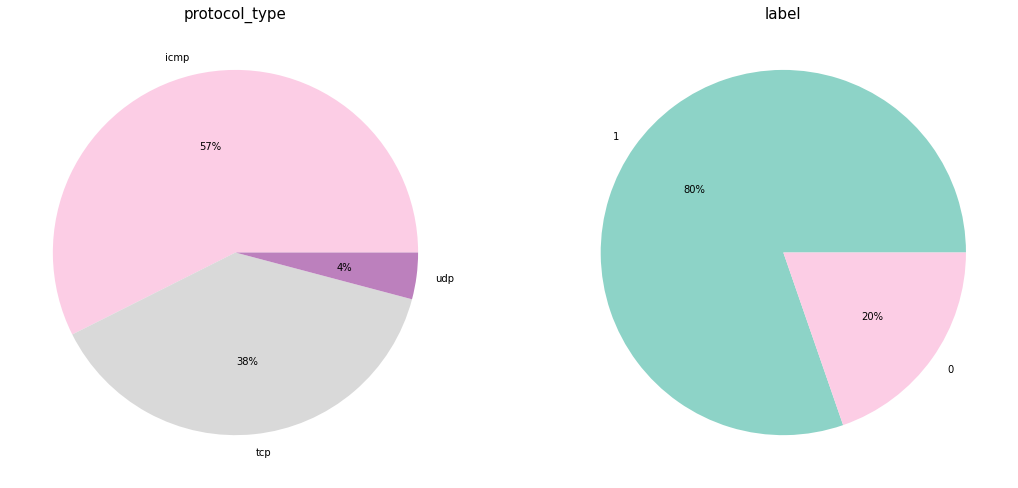

In [20]:
pie_plot(df_train, ['protocol_type', 'label'], 1, 2)

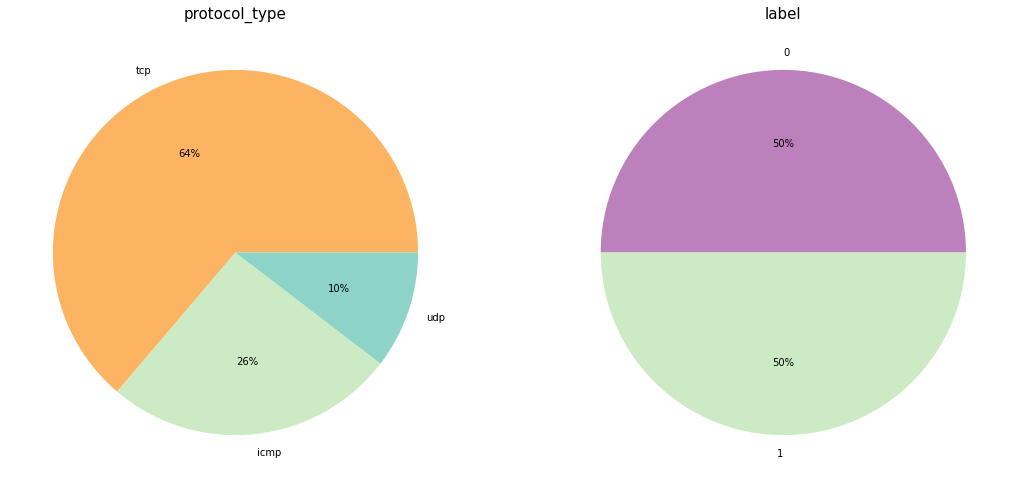

In [21]:
pie_plot(df_equal, ['protocol_type', 'label'], 1, 2)

<a name="Preprocess"></a>
## 5.  Preprocess dataset

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original data
df_encoded = df_equal.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns with object data type
object_columns = ["protocol_type", "service", "flag"]

# Apply label encoding to each object column
for col in object_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Now, all the object columns have been converted to integers
# You can check the data types to confirm
print(df_encoded.dtypes)

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [23]:
df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [24]:
df_encoded['label'].nunique()

2

In [25]:
# Separate features and labels for classification
X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

In [26]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
X.shape

(190000, 41)

In [28]:
# Split the data into train and validation sets
X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.1, random_state=0)

In [29]:
# Separate features and labels for regression
X = df_encoded.drop('label', axis=1)
y_reg = df_encoded['label']

# Standardize the features for regression
scaler_reg = StandardScaler()
X_reg = scaler_reg.fit_transform(X)

# Split the data into train and validation sets for regression
X_train_reg, X_val1_reg, y_train_reg, y_val1_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_val1_reg, y_val1_reg, test_size=0.1, random_state=0)

In [30]:
def evaluate_regression(model, name, X_train, X_test, y_train, y_test):
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)

    print("Training RMSE " + str(name) + ": {:.4f}".format(train_rmse))
    print("Test RMSE " + str(name) + ": {:.4f}".format(test_rmse))


In [31]:
classification_evals = {}

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(np.array(X_train)))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(np.array(X_test)))
    train_precision = metrics.precision_score(y_train, model.predict(np.array(X_train)))
    test_precision = metrics.precision_score(y_test, model.predict(np.array(X_test)))
    train_recall = metrics.recall_score(y_train, model.predict(np.array(X_train)))
    test_recall = metrics.recall_score(y_test, model.predict(np.array(X_test)))

    classification_evals[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall
    }

    print("Training Accuracy " + str(name) + ": {:.2f}".format(train_accuracy * 100))
    print("Test Accuracy " + str(name) + ": {:.2f}".format(test_accuracy * 100))
    print("Training Precision " + str(name) + ": {:.2f}".format(train_precision * 100))
    print("Test Precision " + str(name) + ": {:.2f}".format(test_precision * 100))
    print("Training Recall " + str(name) + ": {:.2f}".format(train_recall * 100))
    print("Test Recall " + str(name) + ": {:.2f}".format(test_recall * 100))

    # Plot the confusion matrix
    actual = y_test
    predicted = model.predict(np.array(X_test))
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal','attack'])

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid(False)
    cm_display.plot(ax=ax)


<a name="Modelling"></a>
## 6.  Model Building

### Logistic Regression

Training Accuracy Logistic Regression: 99.44
Test Accuracy Logistic Regression: 99.47
Training Precision Logistic Regression: 99.63
Test Precision Logistic Regression: 99.65
Training Recall Logistic Regression: 99.25
Test Recall Logistic Regression: 99.30


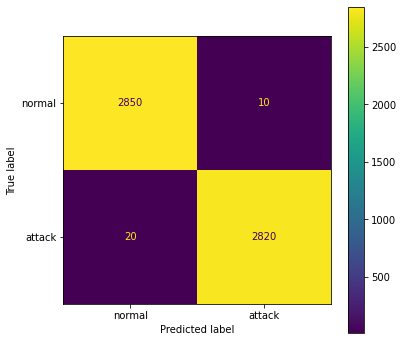

In [32]:
lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

### Knearest neighbors

Training Accuracy KNeighborsClassifier: 99.80
Test Accuracy KNeighborsClassifier: 99.75
Training Precision KNeighborsClassifier: 99.86
Test Precision KNeighborsClassifier: 99.89
Training Recall KNeighborsClassifier: 99.74
Test Recall KNeighborsClassifier: 99.61


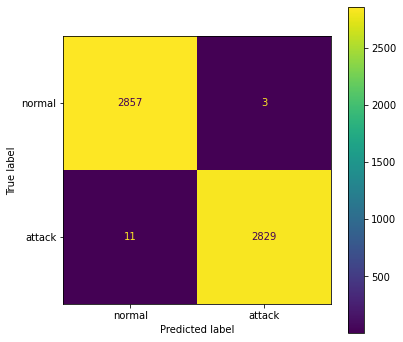

In [33]:
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

### Naive Bayes

Training Accuracy GaussianNB: 96.52
Test Accuracy GaussianNB: 96.02
Training Precision GaussianNB: 97.65
Test Precision GaussianNB: 97.22
Training Recall GaussianNB: 95.31
Test Recall GaussianNB: 94.72


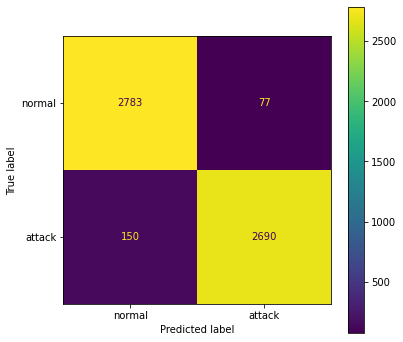

In [34]:
gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

### SVM

Training Accuracy Linear SVC(LBasedImpl): 99.31
Test Accuracy Linear SVC(LBasedImpl): 99.37
Training Precision Linear SVC(LBasedImpl): 99.66
Test Precision Linear SVC(LBasedImpl): 99.75
Training Recall Linear SVC(LBasedImpl): 98.95
Test Recall Linear SVC(LBasedImpl): 98.98


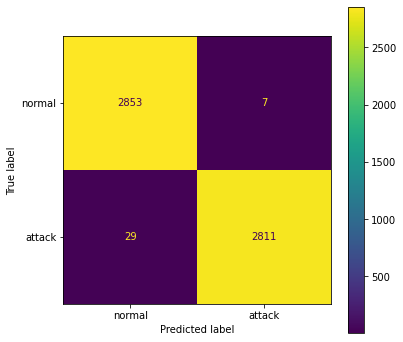

In [35]:
lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

### Decision Tree

Training Accuracy DecisionTreeClassifier: 100.00
Test Accuracy DecisionTreeClassifier: 99.93
Training Precision DecisionTreeClassifier: 100.00
Test Precision DecisionTreeClassifier: 99.96
Training Recall DecisionTreeClassifier: 100.00
Test Recall DecisionTreeClassifier: 99.89


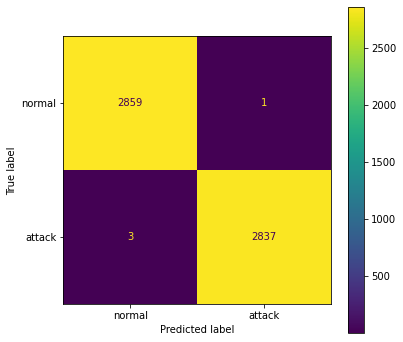

In [36]:
dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

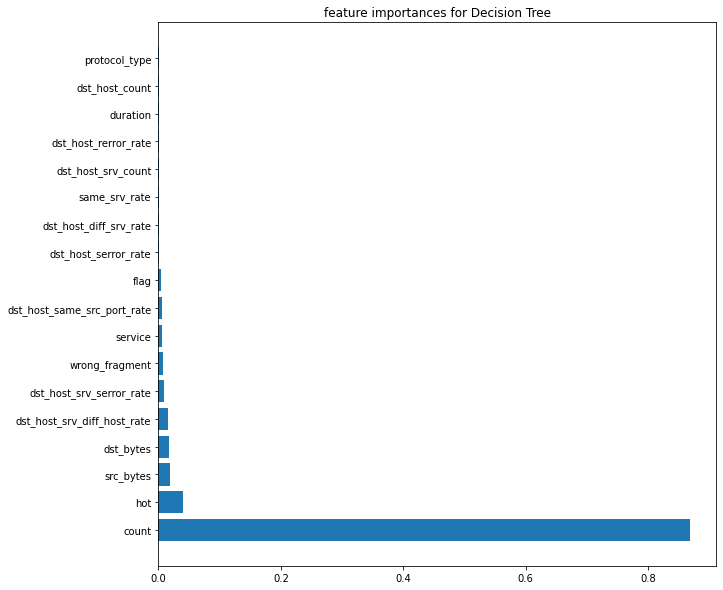

In [37]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = df_train.drop(['label'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(0.5, 0.875, 'X[22] <= -0.46\ngini = 0.5\nsamples = 133000\nvalue = [66728, 66272]'),
 Text(0.25, 0.625, 'X[9] <= 0.328\ngini = 0.11\nsamples = 70358\nvalue = [66230, 4128]'),
 Text(0.125, 0.375, 'X[36] <= 8.681\ngini = 0.067\nsamples = 68215\nvalue = [65858, 2357]'),
 Text(0.0625, 0.125, 'gini = 0.051\nsamples = 67531\nvalue = [65776, 1755]'),
 Text(0.1875, 0.125, 'gini = 0.211\nsamples = 684\nvalue = [82, 602]'),
 Text(0.375, 0.375, 'X[4] <= -0.004\ngini = 0.287\nsamples = 2143\nvalue = [372, 1771]'),
 Text(0.3125, 0.125, 'gini = 0.288\nsamples = 407\nvalue = [336, 71]'),
 Text(0.4375, 0.125, 'gini = 0.041\nsamples = 1736\nvalue = [36, 1700]'),
 Text(0.75, 0.625, 'X[5] <= -0.041\ngini = 0.016\nsamples = 62642\nvalue = [498, 62144]'),
 Text(0.625, 0.375, 'X[11] <= 0.263\ngini = 0.0\nsamples = 62143\nvalue = [2, 62141]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 62141\nvalue = [0, 62141]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.375, 'X[

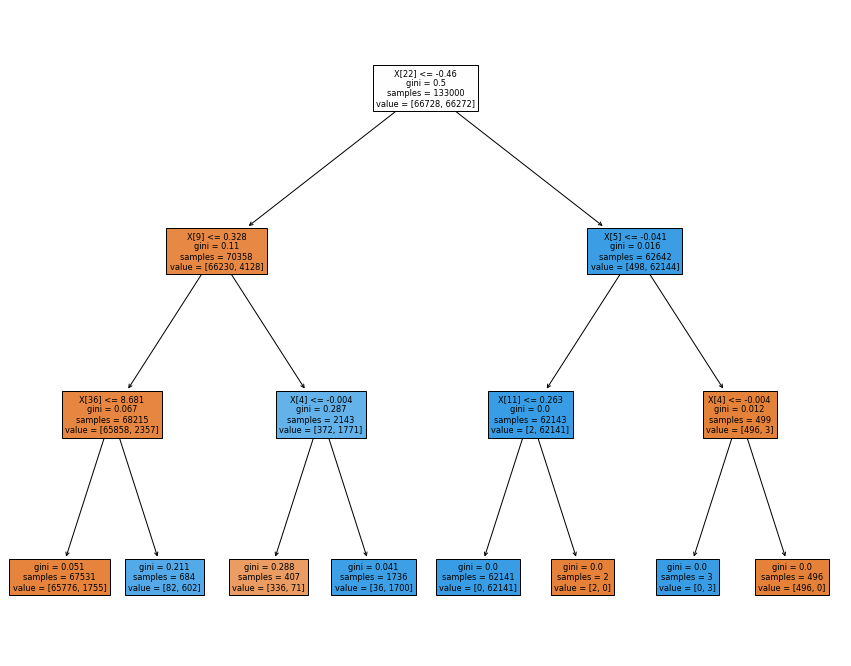

In [38]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

## Random forest

Training Accuracy RandomForestClassifier: 100.00
Test Accuracy RandomForestClassifier: 99.96
Training Precision RandomForestClassifier: 100.00
Test Precision RandomForestClassifier: 100.00
Training Recall RandomForestClassifier: 100.00
Test Recall RandomForestClassifier: 99.93


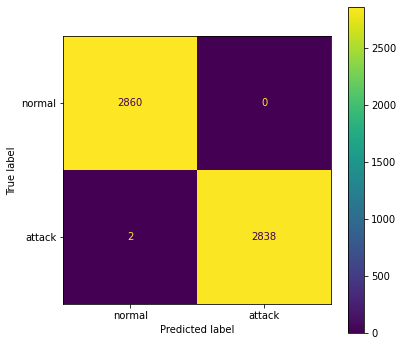

In [39]:
rf = RandomForestClassifier().fit(X_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train, y_test)

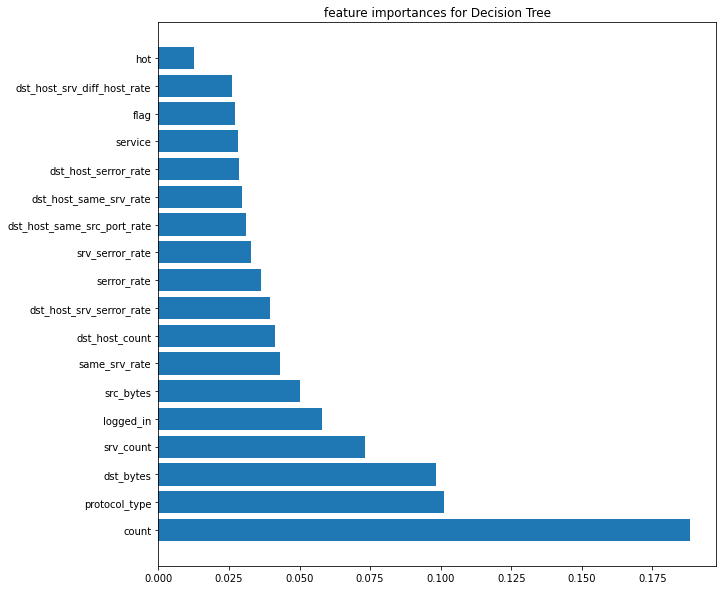

In [40]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

### XGBOOST Regressor in order to predict threat level

In [41]:
# Train XGBoost regressor
xg_r = xgb.XGBRegressor(objective='reg:linear', n_estimators=20).fit(X_train_reg, y_train_reg)

[17:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(X_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(X_test_reg), squared=False)
print("Training Error " + str(name) + ": {:.4f}".format(train_error))
print("Test Error " + str(name) + ": {:.4f}".format(test_error))

Training Error XGBOOST: 0.0223
Test Error XGBOOST: 0.0257


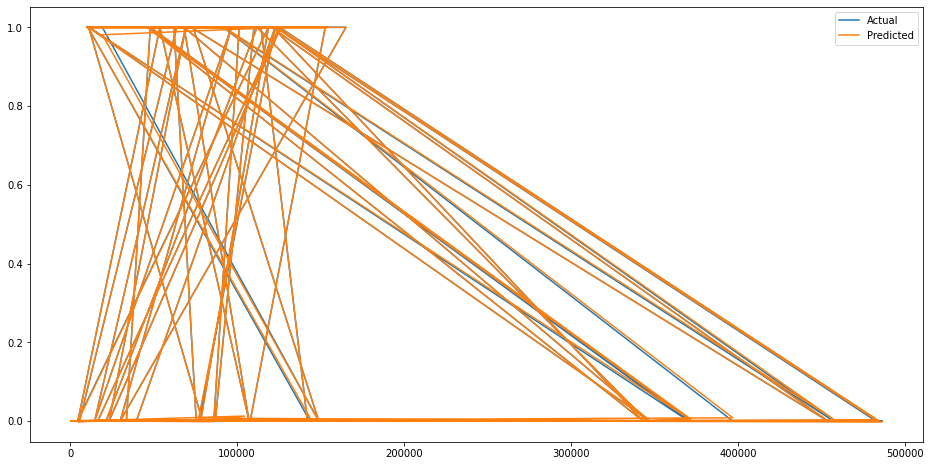

In [43]:
y_pred = xg_r.predict(X_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg, "Y_pred": y_pred})
plt.figure(figsize=(16, 8))
plt.plot(df[:80])
plt.legend(['Actual', 'Predicted'])
plt.show()

### Bagging Ensemble

In [44]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, LinearSVC

In [45]:
# Create base classifiers for the ensemble
base_classifier_dt = DecisionTreeClassifier()
base_classifier_lr = LogisticRegression()
base_classifier_knn = KNeighborsClassifier(n_neighbors=20)
base_classifier_nb = GaussianNB()
base_classifier_svc = CalibratedClassifierCV(LinearSVC())
base_classifier_xgb = xgb.XGBClassifier()

In [46]:
# Create the bagging ensemble
bagging_classifier = BaggingClassifier(base_classifier_dt, n_estimators=20)

In [47]:
# Fit the bagging ensemble on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

Training Accuracy Bagging Ensemble: 100.00
Test Accuracy Bagging Ensemble: 99.95
Training Precision Bagging Ensemble: 100.00
Test Precision Bagging Ensemble: 100.00
Training Recall Bagging Ensemble: 99.99
Test Recall Bagging Ensemble: 99.89


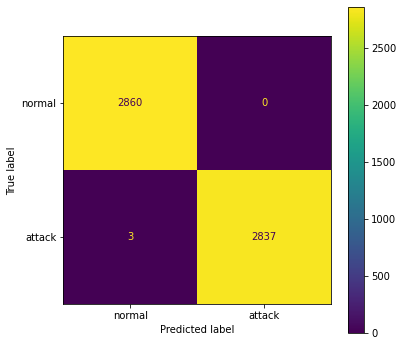

In [48]:
# Evaluate the bagging ensemble
evaluate_classification(bagging_classifier, "Bagging Ensemble", X_train, X_test, y_train, y_test)


### Voting Ensemble

In [49]:
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', base_classifier_lr),
        ('knn', base_classifier_knn),
        ('nb', base_classifier_nb),
        ('svc', base_classifier_svc),
        ('xgb', base_classifier_xgb)
    ],
    voting='soft'  # Use 'soft' voting for probabilities, or 'hard' for majority voting
)

In [50]:
# Fit the voting ensemble on the training data
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('nb', GaussianNB()),
                             ('svc',
                              CalibratedClassifierCV(base_estimator=LinearSVC())),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_cat...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))],
                 voting='soft')

Training Accuracy Voting Ensemble: 99.77
Test Accuracy Voting Ensemble: 99.70
Training Precision Voting Ensemble: 99.93
Test Precision Voting Ensemble: 99.82
Training Recall Voting Ensemble: 99.62
Test Recall Voting Ensemble: 99.58


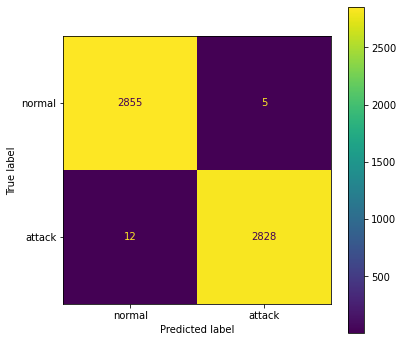

In [51]:
# Evaluate the voting ensemble
evaluate_classification(voting_classifier, "Voting Ensemble", X_train, X_test, y_train, y_test)

### XGB Classification

In [52]:
base_classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Training Accuracy XGBoost: 100.00
Test Accuracy XGBoost: 99.98
Training Precision XGBoost: 100.00
Test Precision XGBoost: 100.00
Training Recall XGBoost: 100.00
Test Recall XGBoost: 99.96


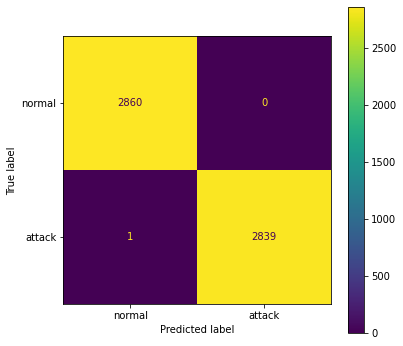

In [53]:
evaluate_classification(base_classifier_xgb, "XGBoost", X_train, X_test, y_train, y_test)

## Neural Networks

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [55]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [57]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4157/4157 [==============================] - 132s 27ms/step - loss: 0.1039 - accuracy: 0.9911 - val_loss: 0.0455 - val_accuracy: 0.9951
Epoch 2/10
4157/4157 [==============================] - 106s 25ms/step - loss: 0.0396 - accuracy: 0.9961 - val_loss: 0.0285 - val_accuracy: 0.9974
Epoch 3/10
4157/4157 [==============================] - 106s 25ms/step - loss: 0.0319 - accuracy: 0.9964 - val_loss: 0.0284 - val_accuracy: 0.9967
Epoch 4/10
4157/4157 [==============================] - 120s 29ms/step - loss: 0.0298 - accuracy: 0.9965 - val_loss: 0.0241 - val_accuracy: 0.9975
Epoch 5/10
4157/4157 [==============================] - 100s 24ms/step - loss: 0.0296 - accuracy: 0.9967 - val_loss: 0.0245 - val_accuracy: 0.9956
Epoch 6/10
4157/4157 [==============================] - 87s 21ms/step - loss: 0.0280 - accuracy: 0.9967 - val_loss: 0.0237 - val_accuracy: 0.9977
Epoch 7/10
4157/4157 [==============================] - 90s 22ms/step - loss: 0.0264 - accuracy: 0.9968 - val_loss: 0.0

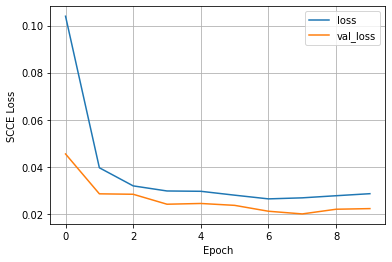

In [58]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

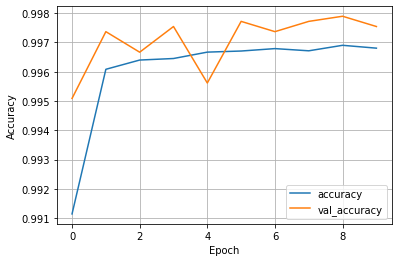

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

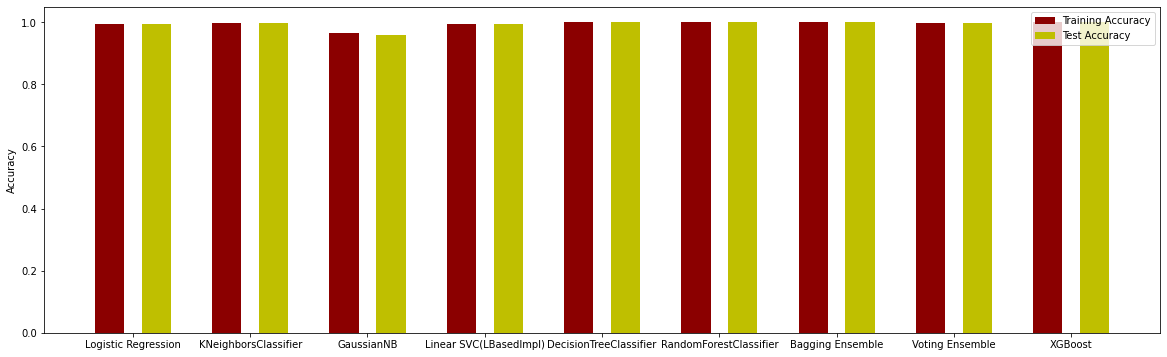

In [60]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Accuracy'] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Accuracy'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

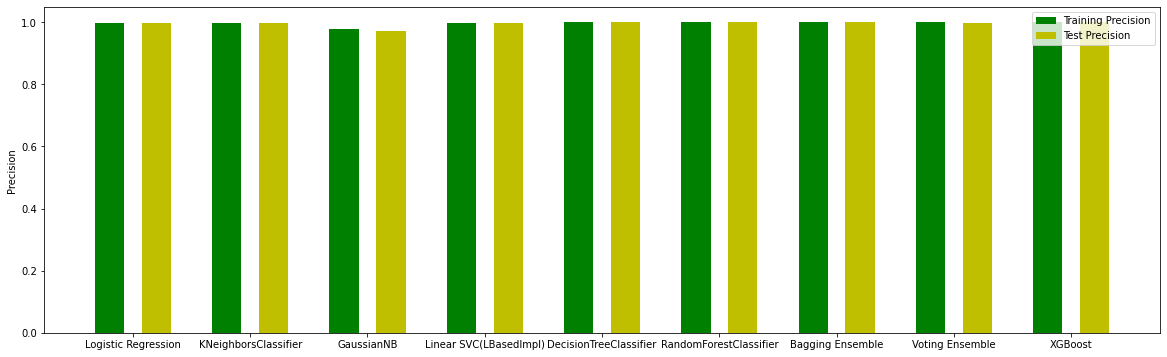

In [61]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Precision'] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Precision'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Precision", "Test Precision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precision")
plt.show()

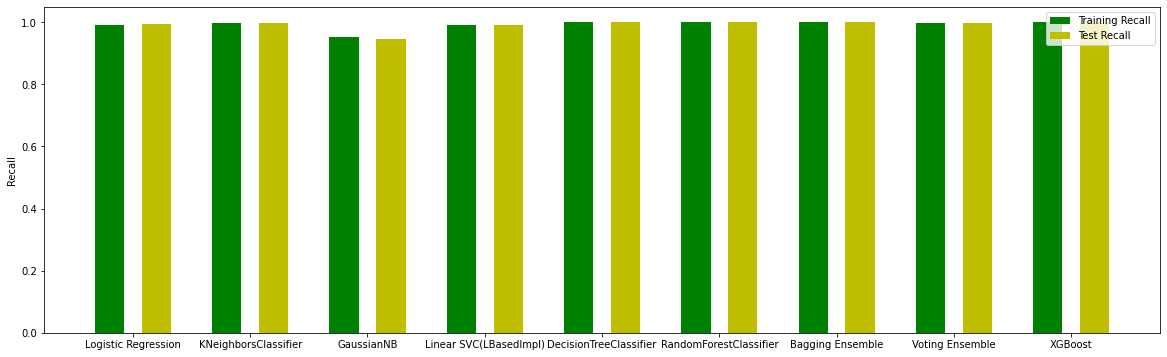

In [62]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Recall'] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Recall'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()